## Иерархический кластерный анализ

#### Описание данных

Каждая строка набора данных описывает цифру (0 = линия присутствует, 1 = линия отсутствует).
<br> Линии соответствуют черточкам на экране калькулятора
<br> B - top horizontal
<br> C - upper left vertical
<br> D - upper right vertical
<br> E - middle horizontal
<br> F - lower left vertical
<br> G - lower right vertical
<br> H - bottom horizontal

#### Импорт библиотек

In [92]:
import pandas as pd 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

#### Загрузка и первчный осмотр данных

In [93]:
df = pd.read_csv('digit.dat', sep=';')
df

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [94]:
# Оставляем первые 8 столбцов, поскольку каждый столбец в таблице данных присутствует дважды
df = df.iloc[:, :8]
df

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [95]:
# Удаляем пробелы и заменяем слова на цифры
df = df.map(lambda x: x.strip()).replace({'ZERO':0, 'ONE':1, 'zero':0, 'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9})
df

C:\Users\Honor\AppData\Local\Temp\ipykernel_5528\296150356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.map(lambda x: x.strip()).replace({'ZERO':0, 'ONE':1, 'zero':0, 'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9})


,A,B,C,D,E,F,G,H
0,7,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,4,0,1,1,1,0,1,0
3,2,1,1,1,1,1,0,0
4,8,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
495,5,1,1,0,1,0,1,1
496,7,1,0,1,1,1,1,0
497,4,0,0,1,1,1,0,0
498,0,1,1,1,0,0,1,0


In [96]:
# Удаляем группирующую переменную - правильная цифра
df_clear = df.drop('A', axis=1)
df_clear

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
495,1,1,0,1,0,1,1
496,1,0,1,1,1,1,0
497,0,0,1,1,1,0,0
498,1,1,1,0,0,1,0


#### Кластеризация

In [97]:
link = linkage(df_clear, 'ward', 'euclidean')
dist = link[:, 2][::-1]
idxs = range(1, len(dist) + 1)

#### Определение количества кластеров

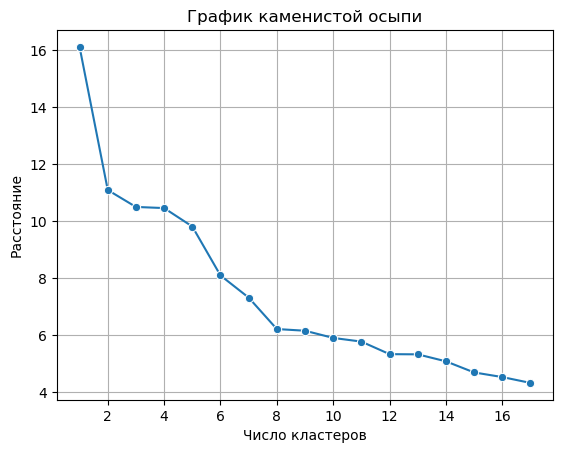

In [132]:
# Построим график каменистой осыпи для 17 кластеров 
rock_line = pd.DataFrame()
rock_line['Число кластеров'] = idxs[:17]
rock_line['Расстояние'] = dist[:17]
sns.lineplot(data = rock_line, x = 'Число кластеров', y = 'Расстояние', markers = True, marker = 'o').set_title('График каменистой осыпи')
plt.grid(True)
plt.show()

Можно заметить, что график начинает быть более пологим начиная с отметки в 8 кластеров. Рассмотрим случаи 8, 10 (логичен с учётом числа реальных существующих цифр) и 12 кластеров.

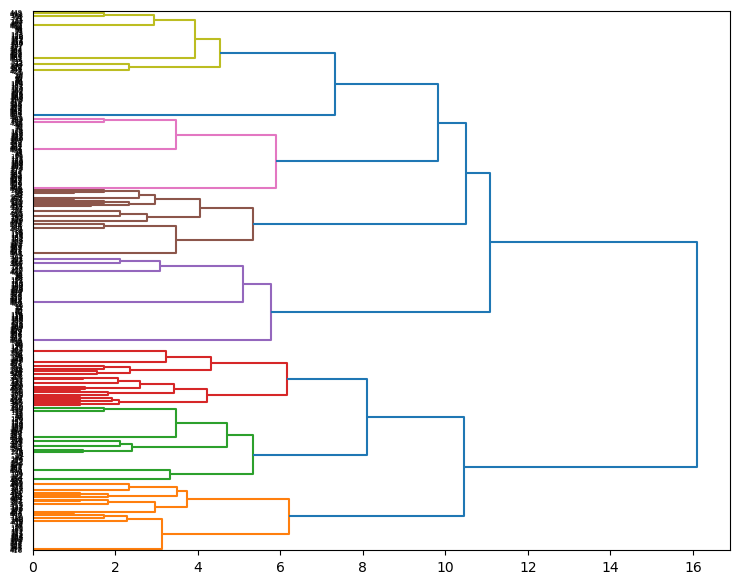

In [84]:
# Построим дендограмму для случая 8 кластеров
fig1 = plt.figure(figsize = (9,7))
dn = dendrogram(link, color_threshold = 7, orientation = "right", leaf_rotation = 0.)
plt.grid(False)
plt.show()

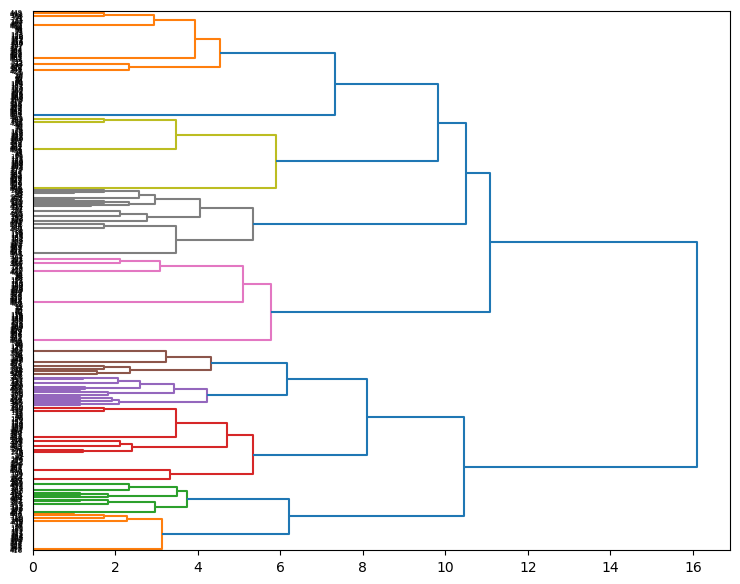

In [85]:
# Построим дендограмму для случая 10 кластеров
fig1 = plt.figure(figsize = (9,7))
dn = dendrogram(link, color_threshold = 6, orientation = "right", leaf_rotation = 0.)
plt.grid(False)
plt.show()

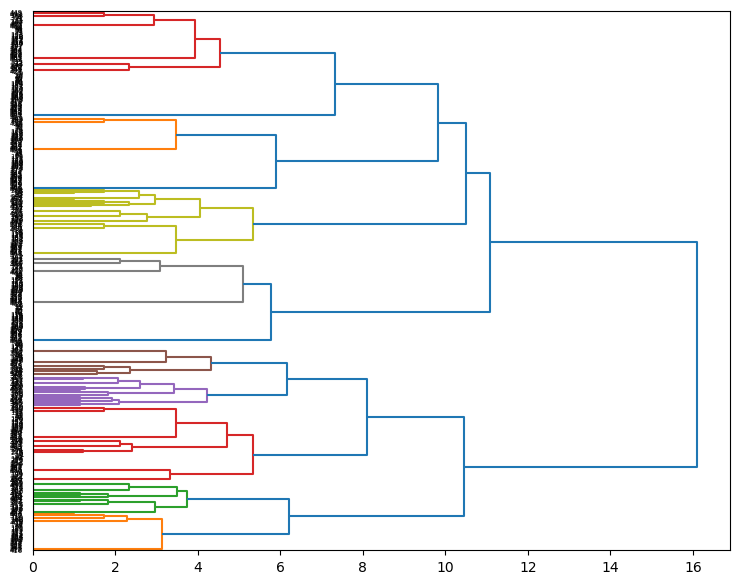

In [110]:
# Построим дендограмму для случая 12 кластеров
fig1 = plt.figure(figsize = (9,7))
dn = dendrogram(link, color_threshold = 5.7, orientation = "right", leaf_rotation = 0.)
plt.grid(False)
plt.show()

#### Интерпретация кластеров

##### Разбиение на 8 кластеров

In [112]:
# Добавим в исходные данные столбец 'кластер'
df['cluster'] = fcluster(link, 8, criterion = 'maxclust')
df['cluster'] = df['cluster']-1

# Выведем описательные статистики для каждого кластера
df.groupby('cluster').mean().drop('A', axis=1)

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.015385,0.907692,0.784615,0.953846,0.261538,0.907692,0.384615
1,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
2,0.900000,0.600000,0.533333,0.633333,0.383333,0.983333,0.100000
3,1.000000,0.800000,0.000000,1.000000,0.475000,0.950000,1.000000
4,0.836066,0.344262,0.754098,0.983607,0.754098,0.000000,0.885246
5,1.000000,0.955224,1.000000,0.537313,1.000000,0.910448,1.000000
6,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
7,0.803571,0.000000,1.000000,0.803571,0.196429,1.000000,1.000000


In [113]:
# Интерпретируем, полученные результаты с помощью столбца, содержащего правильные цифры
pd.DataFrame(df.groupby(['cluster'])['A'].value_counts())

count
cluster A       
0       4     40
        5      5
        8      5
        6      4
        0      3
        1      3
        9      3
        3      2
1       7     35
        1     29
        0      3
        4      1
        9      1
2       7     11
        6      9
        3      8
        4      7
        5      6
        8      6
        9      5
        0      4
        1      4
3       5     33
        6     32
        9      6
        2      5
        3      2
        8      2
4       2     35
        8      6
        9      5
        5      4
        6      4
        4      3
        3      2
        0      1
        1      1
5       8     33
        0     26
        2      3
        3      1
        5      1
        6      1
        7      1
        9      1
6       9     27
        3      5
        5      5
        8      4
        0      1
7       3     35
        9      7
        1      6
        0      4
        8      2
        4      1
        7      1

In [114]:
df[df.cluster==2]

,A,B,C,D,E,F,G,H,cluster
12,1,1,0,1,0,1,1,0,2
16,0,1,0,1,0,1,1,0,2
20,4,1,1,1,1,0,1,0,2
38,8,1,1,1,1,0,1,0,2
42,8,1,1,1,1,1,1,0,2
49,3,1,0,1,1,0,1,0,2
54,1,0,0,0,0,0,1,0,2
56,7,1,0,1,1,0,1,0,2
60,5,1,1,1,1,0,1,0,2
66,3,1,1,0,0,0,1,1,2


<br> Кластер 0: характеризуется преобладанием C D E G и связан с цифрой 4
<br> Кластер 1: характеризуется преобладанием B D G и связан с цифрами 1 и 7 (общие линии - D G, отличительная - B)
<br> Кластер 2: различные цифры, отсканированные с ошибками
<br> Кластер 3: характеризуется преобладанием B C E F G H и связан с цифрами 5 и 6 (общие линии - B C E G H, отличительная - F) 
<br> Кластер 4: характеризуется преобладанием B D E F H и связан с цифрой 2 
<br> Кластер 5: характеризуется преобладанием B C D E F G H и связан с цифрами 0 и 8 (общие линии - B C D F G H, отличительная - E)
<br> Кластер 6: характеризуется преобладанием B C D E G H и связан с цифрой 9
<br> Кластер 7: характеризуется преобладанием B D E G H и связан с цифрой 3

##### Разбиение на 10 кластеров

In [123]:
# Добавим в исходные данные столбец 'кластер'
df['cluster'] = fcluster(link, 10, criterion = 'maxclust')
df['cluster'] = df['cluster']-1

# Выведем описательные статистики для каждого кластера
df.groupby('cluster').mean().drop('A', axis=1)

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.029412,0.852941,1.000000,1.000000,0.000000,0.852941,0.000000
1,0.000000,0.967742,0.548387,0.903226,0.548387,0.967742,0.806452
2,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
3,0.785714,0.678571,0.000000,0.428571,0.428571,0.964286,0.214286
4,1.000000,0.531250,1.000000,0.812500,0.343750,1.000000,0.000000
5,1.000000,0.800000,0.000000,1.000000,0.475000,0.950000,1.000000
6,0.836066,0.344262,0.754098,0.983607,0.754098,0.000000,0.885246
7,1.000000,0.955224,1.000000,0.537313,1.000000,0.910448,1.000000
8,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [126]:
# Интерпретируем, полученные результаты с помощью столбца, содержащего правильные цифры
count_A = pd.DataFrame(df.groupby(['cluster'])['A'].value_counts())
count_A[:37]

count
cluster A       
0       4     30
        1      3
        3      1
1       4     10
        5      5
        8      5
        6      4
        0      3
        9      3
        3      1
2       7     35
        1     29
        0      3
        4      1
        9      1
3       6      9
        7      6
        5      5
        4      3
        1      2
        0      1
        3      1
        8      1
4       3      7
        7      5
        8      5
        9      5
        4      4
        0      3
        1      2
        5      1
5       5     33
        6     32
        9      6
        2      5
        3      2
        8      2

In [127]:
count_A[37:]

count
cluster A       
6       2     35
        8      6
        9      5
        5      4
        6      4
        4      3
        3      2
        0      1
        1      1
7       8     33
        0     26
        2      3
        3      1
        5      1
        6      1
        7      1
        9      1
8       9     27
        3      5
        5      5
        8      4
        0      1
9       3     35
        9      7
        1      6
        0      4
        8      2
        4      1
        7      1

<br> Кластер 0: характеризуется преобладанием C D E G и связан с цифрой 4
<br> Кластер 1: цифры, отсканированные с ошибками (в основном цифра 4)
<br> Кластер 2: характеризуется преобладанием B D G и связан с цифрами 1 и 7 (общие линии - D G, отличительная - B)
<br> Кластер 3 и 4: различные цифры, отсканированные с ошибками
<br> Кластер 5: характеризуется преобладанием B C E F G H и связан с цифрами 5 и 6 (общие линии - B C E G H, отличительная - F) 
<br> Кластер 6: характеризуется преобладанием B D E F H и связан с цифрой 2 
<br> Кластер 7: характеризуется преобладанием B C D E F G H и связан с цифрами 0 и 8 (общие линии - B C D F G H, отличительная - E)
<br> Кластер 8: характеризуется преобладанием B C D E G H и связан с цифрой 9
<br> Кластер 9: характеризуется преобладанием B D E G H и связан с цифрой 3

##### Разбиение на 12 кластеров

In [118]:
# Добавим в исходные данные столбец 'кластер'
df['cluster'] = fcluster(link, 12, criterion = 'maxclust')
df['cluster'] = df['cluster']-1

# Выведем описательные статистики для каждого кластера
df.groupby('cluster').mean().drop('A', axis=1)

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.029412,0.852941,1.000000,1.000000,0.000000,0.852941,0.000000
1,0.000000,0.967742,0.548387,0.903226,0.548387,0.967742,0.806452
2,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
3,0.785714,0.678571,0.000000,0.428571,0.428571,0.964286,0.214286
4,1.000000,0.531250,1.000000,0.812500,0.343750,1.000000,0.000000
5,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
6,1.000000,0.644444,0.000000,1.000000,0.844444,0.911111,1.000000
7,0.836066,0.344262,0.754098,0.983607,0.754098,0.000000,0.885246
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
# Интерпретируем, полученные результаты с помощью столбца, содержащего правильные цифры
count_A = pd.DataFrame(df.groupby(['cluster'])['A'].value_counts())
count_A[31:]

count
cluster A       
5       5     30
        9      3
        6      2
6       6     30
        2      5
        5      3
        9      3
        3      2
        8      2
7       2     35
        8      6
        9      5
        5      4
        6      4
        4      3
        3      2
        0      1
        1      1
8       8     31
        0      2
        5      1
        6      1
        9      1
9       0     24
        2      3
        8      2
        3      1
        7      1
10      9     27
        3      5
        5      5
        8      4
        0      1
11      3     35
        9      7
        1      6
        0      4
        8      2
        4      1
        7      1

<br> Кластер 0: характеризуется преобладанием C D E G и связан с цифрой 4
<br> Кластер 1: цифры, отсканированные с ошибками (в основном цифра 4)
<br> Кластер 2: характеризуется преобладанием B D G и связан с цифрами 1 и 7 (общие линии - D G, отличительная - B)
<br> Кластер 3 и 4: различные цифры, отсканированные с ошибками
<br> Кластер 5: характеризуется преобладанием B C E G H и связан с цифрой 5
<br> Кластер 6: характеризуется преобладанием B C E F G H и связан с цифрой 6
<br> Кластер 7: характеризуется преобладанием B D E F H и связан с цифрой 2 
<br> Кластер 8: характеризуется преобладанием B C D E F G H и связан с цифрой 8
<br> Кластер 9: характеризуется преобладанием B C D F G H и связан с цифрой 0
<br> Кластер 10: характеризуется преобладанием B C D E G H и связан с цифрой 9
<br> Кластер 11: характеризуется преобладанием B D E G H и связан с цифрой 3

#### Выводы

При разбиении на 8 кластеров выделяется отдельный кластер для цифр с ошибками сканирования. Остальные кластеры соответствуют одной или двум цифрам, различающимися одной линией.

При увеличении числа кластеров до 10 наблюдается появление дополнительных кластеров для цифр, отсканированных с ошибками, что усложняет интепретацию результатов.

При разбиении на 12 кластеров получается более детализированный результат в отличии от варианта 10 кластеров. Одному кластеру соответствует одна цифра, кроме цифр 1 и 7, которые также объединены в один кластер.